In [1]:
%load_ext autoreload
%autoreload 2
%config Completer.use_jedi = False

import os 
import sys 

# TODO: remove '..' if run from root folder
home = os.path.abspath(os.path.join(os.getcwd(), '..', '..', '..'))
pths = [os.path.join(home, 'astrobot')]
[sys.path.insert(0, pth) for pth in pths if pth not in sys.path]

from astrobot.util import *

import matplotlib.pyplot as plt 
import numpy as np 
from pprint import pprint as pp 
import pandas as pd 

# Tab after '.' to get all methods 
# Tab Shift after () to get documentation.
# To read excel data:
# pd.read_excel('afn_infil_data.xlsx')
# pd.read_clipboard()

# For experiments
# path to astrobot root
ROOT_DIR

# path to this package from experiments folder
PACKAGE_FPATH_FOR_EXPERIMENTS

# path to epw from experiments folder
EPW_FPATH_FOR_EXPERIMENTS

'c:\\Users\\saera\\master\\astrobot\\resources\\epw\\philadelphia\\philadelphia.epw'

In [2]:
import skgeom as sg 
#import shapely.geometry as sh
from skgeom.draw import draw
import astrobot.geom_util as gu 

# make site
# offset/grid 
# convert to lists, and save as pkl.
# Make a lot.  
# open in gh, and run through iteration

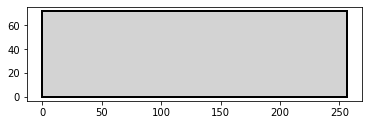

In [3]:
# parameters 
dimx, dimy = 256, 72
street_dim = 12
inc = 36

def poly_sg(xy_array):
  return sg.Polygon(xy_array)  

asg = poly_sg(np.array([(0, 0), (street_dim, 0), (street_dim, dimy), (0, dimy)])) 

# make site 
site_np = np.array([(0, 0), (dimx, 0), (dimx, dimy), (0, dimy)])
ref_site_sg = poly_sg(site_np)
draw(ref_site_sg)


In [5]:
# make grid 
tol = 3.0
ref_street_np = np.array([(0, -tol), (street_dim, -tol), (street_dim, dimy + tol), (0, dimy + tol)])

# Make homogenous
ref_street_np = np.column_stack([ref_street_np, np.ones(4)])
ref_street_np[:, 0] = ref_street_np[:, 0] - street_dim

def _tran_mtx(_inc): 
    return np.array(
        [[1, 0, _inc],
         [0, 1, 0]])
    
sites_sg = []
for i in np.arange(inc, dimx, inc):
    street_np = _tran_mtx(i) @ ref_street_np.T
    # back to row space
    _sites_sg = sg.boolean_set.difference(ref_site_sg, poly_sg(street_np.T))
    _sites_sg = [s.outer_boundary() for s in _sites_sg]
    # sort set by x-dir
    _sites_sg = sorted(_sites_sg, key=lambda s: s.coords[:,0].max())
    ref_site_sg = _sites_sg.pop()
    sites_sg.extend(_sites_sg)


#draw(poly_sg(street_np.T))
#draw(sites_sg)

